In [1]:
import os 
os.getcwd()
os.chdir('../')

In [2]:
from src.methods.bose import bose
# Timing
from timeit import default_timer
from datetime import datetime as dt

/home/vinh/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pm4py import read_xes


In [4]:
log = read_xes('data/bose_log.xes')

parsing log, completed traces :: 100%|██████████████████| 6000/6000 [00:03<00:00, 1922.49it/s]


In [5]:
WINDOW_SIZE = 200
MEASURE_WINDOW = None

In [6]:
start_j = default_timer()
p_j = bose.detectChange_JMeasure_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_j = default_timer() - start_j
start_wc = default_timer()
p_wc = bose.detectChange_WC_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_wc = default_timer() - start_wc

Calculating J P-Values for Bose, activity pairs complete ::   0%| | 1/225 [00:04<15:36,  4.18s/home/vinh/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
Calculating J P-Values for Bose, activity pairs complete :: 100%|█| 225/225 [11:56<00:00,  3.1
Calculating WC P-Values for Bose, activity pairs complete :: 100%|█| 225/225 [10:55<00:00,  2.


In [7]:
cp_j = bose.visualInspection(p_j, WINDOW_SIZE)
cp_wc = bose.visualInspection(p_wc, WINDOW_SIZE)

print(f"J Measure Extraction detected {cp_j}.")
print(f"Window Count Extraction detected {cp_wc}.")

J Measure Extraction detected [1201, 2359, 3604, 4810].
Window Count Extraction detected [1201, 2357, 3598, 4810].


In [8]:
import matplotlib.pyplot as plt

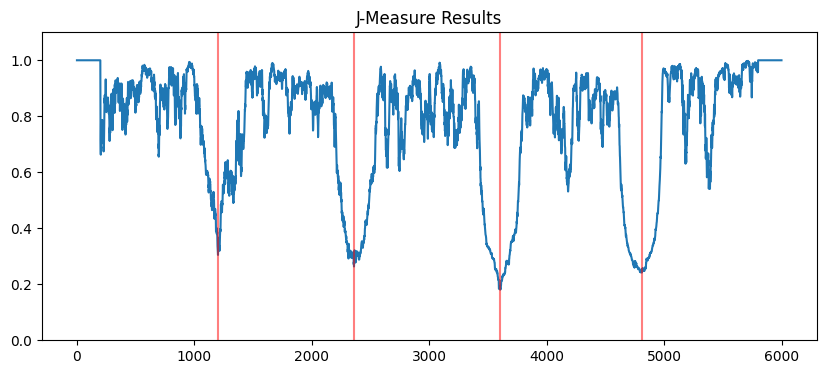

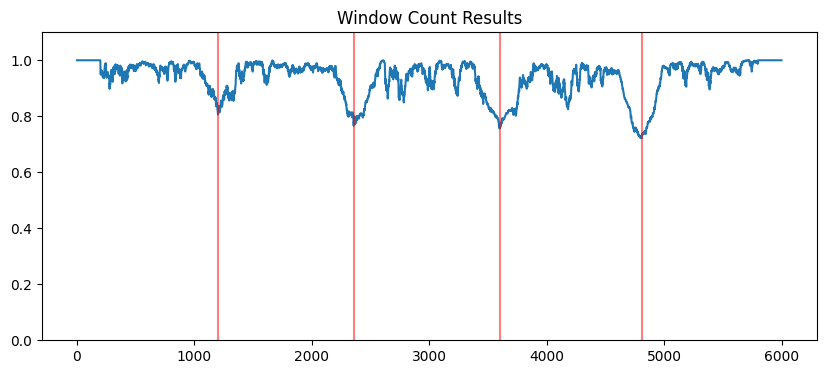

In [9]:

def plotPvals(sig, cp, title):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    plt.ylim(0,1.1)
    plt.title(title)
    plt.show()

plotPvals(p_j,cp_j, "J-Measure Results")
plotPvals(p_wc,cp_wc, "Window Count Results")